In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [2]:
std::ifstream fin("p-feats-from-DTH.dat");

std::vector<float>pt;
std::vector<float>eta;
std::vector<float>phi;
std::vector<int>pid;
float value;

std::string line;
std::getline(fin, line);
std::istringstream pt_line(line);
while (pt_line >> value) {
    pt.push_back(value);
}

std::getline(fin, line);
std::istringstream eta_line(line);
while (eta_line >> value) {
    eta.push_back(value);
}

std::getline(fin, line);
std::istringstream phi_line(line);
while (phi_line >> value) {
    phi.push_back(value);
}

std::getline(fin, line);
std::istringstream pid_line(line);
while (pid_line >> value) {
    pid.push_back(value);
}


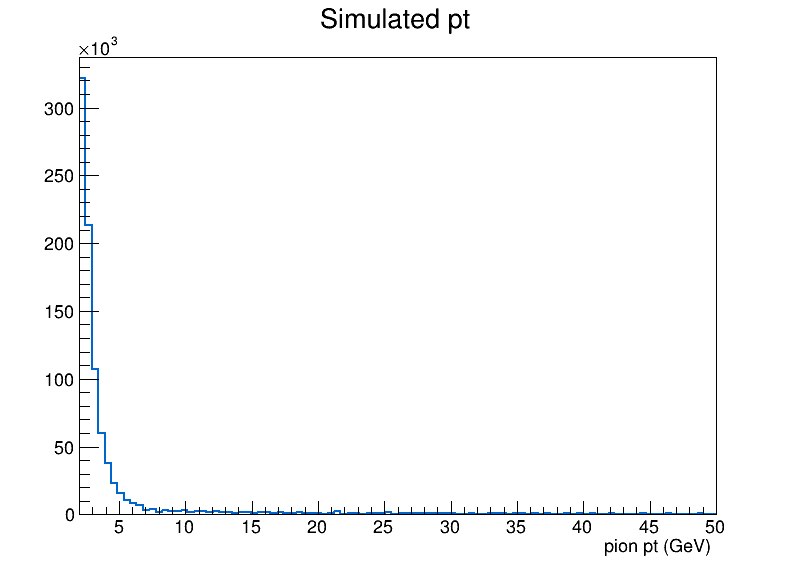

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [9]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// L1PUPPI /////////////

// auto L1puppi_pt   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
// std::vector<double> L1puppi_pts;
// for (const auto& L1puppi_pti : L1puppi_pt) {
//     L1puppi_pts.insert(L1puppi_pts.end(), L1puppi_pti.begin(), L1puppi_pti.end());
// }

// TH1F* hist_L1puppi = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 100, 2, 50); //GeV
// for (const auto &L1pt : L1puppi_pts){
//     if(L1pt>=2) hist_L1puppi->Fill(L1pt);
// }

///////////// SIMULATED /////////////
TH1F* hist_genpt = new TH1F("hist", "Simulated pt; pion pt (GeV)", 100, 2, 50); //GeV
for (const auto &p : pt){
    hist_genpt->Fill(p);
}

hist_genpt -> SetLineColor(kAzure+2);
hist_genpt -> SetLineWidth(2);
// hist_L1puppi -> SetLineColor(kOrange+8);
// hist_L1puppi -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Pt distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_genpt, "SimPi", "f"); 
// legend->AddEntry(hist_L1puppi, "L1Puppi", "f");
legend->Draw();

hist_genpt->Draw();
// hist_L1puppi->Draw("same");
// gStyle->SetOptStat(0);
// c1->SetLogy();
c1->Draw();

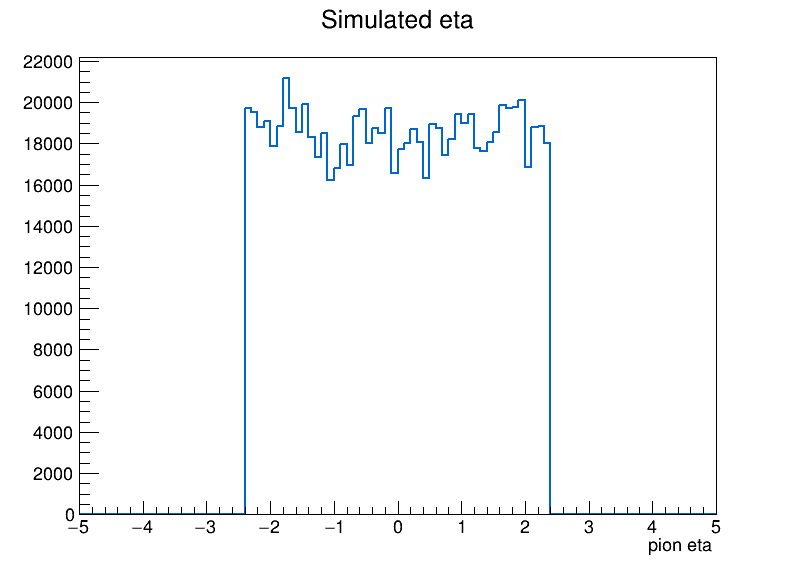

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [4]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// L1PUPPI /////////////
// auto L1puppi_eta   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_eta").GetValue();
// std::vector<double> L1puppi_etas;
// // for (const auto& L1puppi_etai : L1puppi_eta) {
    // // // // L1puppi_etas.insert(L1puppi_etas.end(), L1puppi_etai.begin(), L1puppi_etai.end());
// }

// TH1F* hist_L1puppi = new TH1F("hist", "L1Puppi eta; pion eta", 100, -5, 5); //GeV
// for (const auto &L1eta : L1puppi_etas){
    // hist_L1puppi->Fill(L1eta);
// }

///////////// SIMULATED /////////////
TH1F* hist_geneta = new TH1F("hist", "Simulated eta; pion eta", 100, -5, 5); //GeV
for (const auto &p : eta){
    hist_geneta->Fill(p);
}

hist_geneta -> SetLineColor(kAzure+2);
hist_geneta -> SetLineWidth(2);
// hist_L1puppi -> SetLineColor(kOrange+8);
// hist_L1puppi -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Eta distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_geneta, "SimPi", "f"); 
// legend->AddEntry(hist_L1puppi, "L1Puppi", "f");
legend->Draw();

// hist_L1puppi->Draw();
hist_geneta->Draw();
gStyle->SetOptStat(0);
c1->Draw();

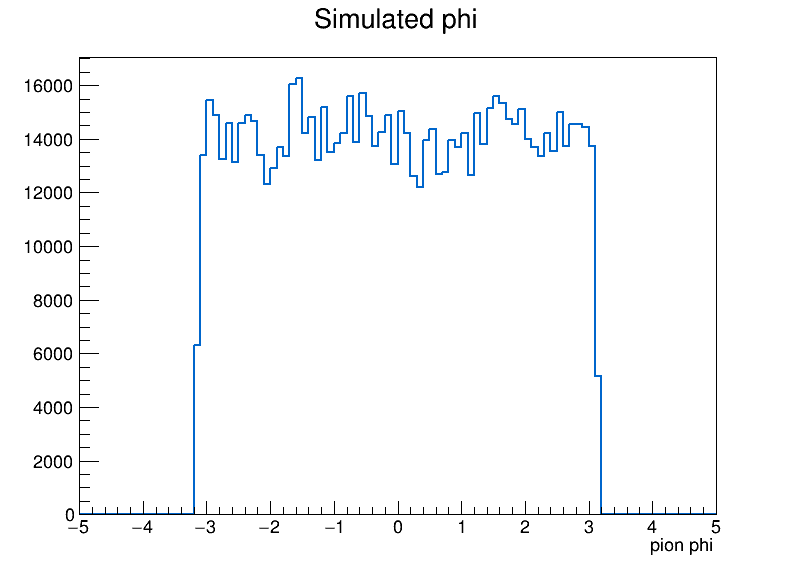

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [5]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// L1PUPPI /////////////

// auto L1puppi_phi   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_phi").GetValue();
// std::vector<float> L1puppi_phis;
// for (const auto& L1puppi_phii : L1puppi_phi) {
//     L1puppi_phis.insert(L1puppi_phis.end(), L1puppi_phii.begin(), L1puppi_phii.end());
// }

// TH1F* hist_L1puppi = new TH1F("hist", "L1Puppi phi; pion phi", 100, -5, 5); //GeV
// for (const auto &L1phi : L1puppi_phis){
//     hist_L1puppi->Fill(L1phi);
// }

///////////// SIMULATED /////////////
TH1F* hist_genphi = new TH1F("hist", "Simulated phi; pion phi", 100, -5, 5); //GeV
for (const auto &p : phi){
    hist_genphi->Fill(p);
}

hist_genphi -> SetLineColor(kAzure+2);
hist_genphi -> SetLineWidth(2);
// hist_L1puppi -> SetLineColor(kOrange+8);
// hist_L1puppi -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Eta distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_genphi, "SimPi", "f"); 
// legend->AddEntry(hist_L1puppi, "L1Puppi", "f");
legend->Draw();

// hist_L1puppi->Draw("same");
hist_genphi->Draw();
gStyle->SetOptStat(0);
c1->Draw();

## n distribution

In [6]:
std::ifstream input("n_puppi.dat");

std::vector<int> numbers;
int num;

while (input >> num) {
    numbers.push_back(num);
}

input.close();

// Stampa gli elementi dell'array
for (int i = 0; i < numbers.size(); ++i) {
    std::cout << numbers[i] << " ";
}


33 21 26 20 23 34 27 38 39 14 20 13 24 37 62 19 48 37 44 53 29 23 28 30 31 30 20 28 52 26 23 30 22 52 49 20 39 54 33 45 35 33 37 33 28 23 28 23 18 27 35 22 38 26 29 42 17 29 35 29 40 29 38 16 25 35 21 30 22 28 25 36 22 15 33 71 25 27 22 33 39 15 23 24 18 26 27 41 21 31 17 13 20 39 26 70 27 21 26 19 44 60 28 23 25 27 44 25 21 23 34 42 42 30 22 21 27 49 27 17 29 30 37 25 28 53 16 28 32 22 26 31 41 19 22 34 45 21 21 25 18 27 10 20 50 23 19 41 35 35 17 17 43 24 20 73 13 22 19 54 15 15 29 26 28 29 32 21 45 24 28 15 22 14 42 20 17 21 67 27 40 32 54 37 20 22 26 29 26 34 35 13 28 40 18 17 29 19 20 26 40 31 48 22 18 45 47 16 22 42 34 37 19 39 47 24 25 31 32 18 17 34 26 34 46 23 25 63 39 21 29 17 47 16 37 31 37 22 27 31 39 30 34 33 53 33 31 31 42 9 11 28 48 31 45 12 97 55 30 33 18 40 27 14 38 29 22 32 29 41 31 44 35 30 20 33 20 15 36 23 40 27 26 33 35 30 21 58 21 36 40 47 23 42 37 34 28 18 31 14 44 27 32 16 31 27 31 25 11 37 21 20 31 27 49 25 15 30 46 23 18 54 21 21 51 28 26 26 29 51 45 26 47 26

In [7]:
numbers

(std::vector<int> &) { 33, 21, 26, 20, 23, 34, 27, 38, 39, 14, 20, 13, 24, 37, 62, 19, 48, 37, 44, 53, 29, 23, 28, 30, 31, 30, 20, 28, 52, 26, 23, 30, 22, 52, 49, 20, 39, 54, 33, 45, 35, 33, 37, 33, 28, 23, 28, 23, 18, 27, 35, 22, 38, 26, 29, 42, 17, 29, 35, 29, 40, 29, 38, 16, 25, 35, 21, 30, 22, 28, 25, 36, 22, 15, 33, 71, 25, 27, 22, 33, 39, 15, 23, 24, 18, 26, 27, 41, 21, 31, 17, 13, 20, 39, 26, 70, 27, 21, 26, 19, 44, 60, 28, 23, 25, 27, 44, 25, 21, 23, 34, 42, 42, 30, 22, 21, 27, 49, 27, 17, 29, 30, 37, 25, 28, 53, 16, 28, 32, 22, 26, 31, 41, 19, 22, 34, 45, 21, 21, 25, 18, 27, 10, 20, 50, 23, 19, 41, 35, 35, 17, 17, 43, 24, 20, 73, 13, 22, 19, 54, 15, 15, 29, 26, 28, 29, 32, 21, 45, 24, 28, 15, 22, 14, 42, 20, 17, 21, 67, 27, 40, 32, 54, 37, 20, 22, 26, 29, 26, 34, 35, 13, 28, 40, 18, 17, 29, 19, 20, 26, 40, 31, 48, 22, 18, 45, 47, 16, 22, 42, 34, 37, 19, 39, 47, 24, 25, 31, 32, 18, 17, 34, 26, 34, 46, 23, 25, 63, 39, 21, 29, 17, 47, 16, 37, 31, 37, 22, 27, 31, 39, 30, 34, 33, 5

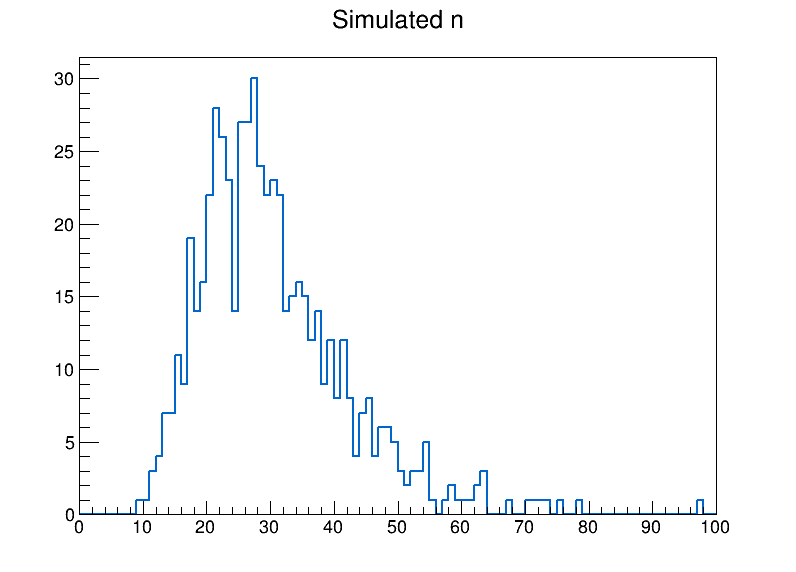

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [8]:
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : numbers){
    hist_n->Fill(n);
}

hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("n distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_n, "", "f"); 
legend->Draw();

hist_n->Draw();
gStyle->SetOptStat(0);
c1->Draw();